In [1]:
import pandas as pd

In [2]:
# import dataset from csv file
df = pd.read_csv('tweet_sentiment_450K.csv')

In [3]:
review_df = df[['text', 'airline_sentiment']]
review_df = review_df[review_df['airline_sentiment'] != 'neutral']
review_df = review_df.sample(frac=1) #Shuffle array
print(review_df.shape)
review_df.head(5)


(450201, 2)


,text,airline_sentiment
382797,@catherineLd @OzAtheist have no idea what CFM'...,positive
34324,@minorityx there were this year too though,negative
22828,"Ok, live show tonight at 8pm uk (3pm ET ) link...",negative
253840,"@kanzeon It is, isn't it? What do you like bet...",positive
93875,Stupid PVR crashing,negative


In [4]:
print(review_df["airline_sentiment"].value_counts())


negative    226824
positive    223377
Name: airline_sentiment, dtype: int64


In [5]:
sentiment_label = review_df.airline_sentiment.factorize()
tweet = review_df.text.values

print(sentiment_label)


(array([0, 1, 1, ..., 1, 0, 0], dtype=int64), Index(['positive', 'negative'], dtype='object'))


In [6]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(tweet)
print(len(tokenizer.word_index)) # dictionary of words and their index
encoded_docs = tokenizer.texts_to_sequences(tweet)

c:\Users\prami\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


274654


In [7]:
from keras.preprocessing.sequence import data_utils
padded_sequence = data_utils.pad_sequences(tokenizer.texts_to_sequences(tweet), maxlen=200)

In [8]:
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from keras.layers import Embedding
from keras.callbacks import History

vocab_size = len(tokenizer.word_index) + 1
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           8788960   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 8,805,611
Trainable params: 8,805,611
Non-trainable params: 0
______________________________________________

In [9]:
history = model.fit(padded_sequence, sentiment_label[0],validation_split=0.1, epochs=4, batch_size=16)

Epoch 1/4
25324/25324 [==============================] - 4984s 197ms/step - loss: 0.4615 - accuracy: 0.7825 - val_loss: 0.4198 - val_accuracy: 0.8058
Epoch 2/4
25324/25324 [==============================] - 4992s 197ms/step - loss: 0.4067 - accuracy: 0.8160 - val_loss: 0.4094 - val_accuracy: 0.8128
Epoch 3/4
25324/25324 [==============================] - 4866s 192ms/step - loss: 0.3804 - accuracy: 0.8319 - val_loss: 0.4234 - val_accuracy: 0.8129
Epoch 4/4
25324/25324 [==============================] - 4860s 192ms/step - loss: 0.3630 - accuracy: 0.8419 - val_loss: 0.4240 - val_accuracy: 0.8128


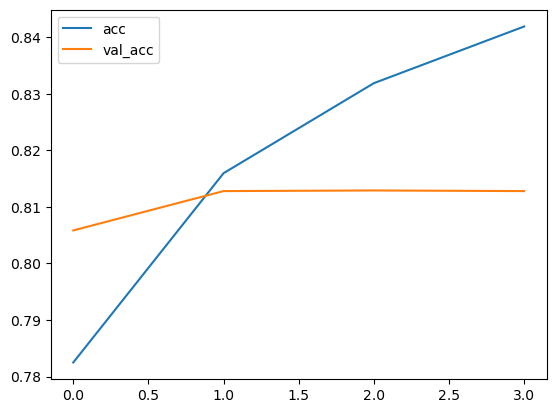

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# plt.savefig("Accuracy plot.jpg")



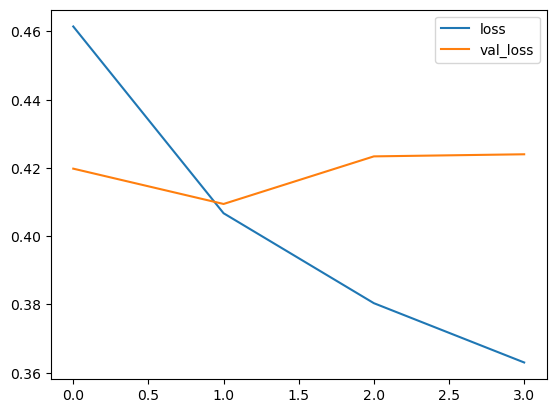

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
# plt.savefig("Loss plt.jpg")
plt.show()


In [12]:
def predict_sentiment(text: str):
    tw = tokenizer.texts_to_sequences([text])
    tw = data_utils.pad_sequences(tw, maxlen=200)
    prediction = int(model.predict(tw).round().item())
    return sentiment_label[1][prediction]


In [ ]:
test_data_frame = pd.read_csv('tweet_sentiment.csv')
text = test_data_frame["text"]
sentiment = test_data_frame['airline_sentiment']

In [ ]:
import random

total = 100
score = 0

for i in range(total):
  index = int(random.random()*len(text))
  test_text = text[index]
  result = predict_sentiment(test_text)
  score += 1
  
  print(i)
  print(result)

In [ ]:
#Print score

print(f"Predicted with accuracy of {(score / total)*100}")

In [13]:
#Save the model

model.save("./sa_450K")

INFO:tensorflow:Assets written to: ./sa_450K\assets


In [14]:
for i in range(2):
  user_input = input("Enter text to analyze: ")
  print(predict_sentiment(user_input))

1/1 [==============================] - 0s 270ms/step
positive
1/1 [==============================] - 0s 35ms/step
positive
